# 200_Analysis_Industry_Growth

## Purpose

This notebook will look at the growth in the gaming indusry over the last thirty years. The results will then be used to see what type of game a company should release to make the most sales.

## Datasets

- Input: Clean_Games_Sales_Total.pkl && Console_Sales_All_TIme.pkl
- Output: 200_Analysis_Industry_Growth_Sales.pkl && 200_Analysis_Industry_Growth_Counts.pkl

In [1]:
import os 
import sys
import pandas as pd
import numpy as np 
import hashlib 
import matplotlib.pylab as plt 

%matplotlib inline 

In [2]:
if not os.path.exists("../../data/prep/Clean_Games_Sales_Total.pkl"):
    print("Missing Dataset File")

In [3]:
if not os.path.exists("../../data/prep/Console_Sales_All_Time.pkl"):
    print("Missing Dataset File")

## Loading the datasets

In [4]:
videogames = pd.read_pickle("../../data/prep/Clean_Games_Sales_Total.pkl")
videogames.shape

(16444, 11)

In [5]:
consoles = pd.read_pickle("../../data/prep/Console_Sales_All_Time.pkl")
consoles.shape

(26, 9)

## Overview of datasets

Getting a brief overview of the datasets so we can see what column names are and what data is in them.

In [6]:
videogames.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales Developer  
0     41.36     28.96      3.77         8.45         82.53  Nintendo  
1     29.08      3.58      6.81         0.77         40.24       NaN  
2     15.68     12.76      3.79         3.29         35.52  Nintendo  
3     15.61     10.93      3.28         2.95         32.77  Nintendo  
4     11.27      8.89     10.22         1.00         31.37       NaN

In [7]:
videogames["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
videogames["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [9]:
consoles.head()

Console Abbreviation  Sales_NA  Sales_Europe  Sales_Japan  \
0  Playstation 2          PS2     53.65         55.28        23.18   
1    Nintendo DS           DS     57.39         52.07        33.01   
2       Game Boy           GB     43.18         40.05        32.47   
3   Playstation            PS     38.94         36.91        19.36   
4   Nintendo Wii          Wii     45.51         33.88        12.77   

   Sales_Rest_Of_World  Sales_Total  Release_Year Developer  
0                25.57       157.68          2000      Sony  
1                12.43       154.90          2004  Nintendo  
2                 2.99       118.69          1989  Nintendo  
3                 9.04       104.25          1994      Sony  
4                 9.48       101.64          2006  Nintendo

In [10]:
consoles["Developer"].unique()

array(['Sony', 'Nintendo', 'Microsoft', 'Sega', 'Atari'], dtype=object)

# Industry Growth Analysis

## Sales

In [11]:
yearly_sales = videogames.groupby('Year_of_Release').sum()
yearly_sales.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year_of_Release                                                         
1980.0              10.59      0.67      0.00         0.12         11.38
1981.0              33.40      1.96      0.00         0.32         35.77
1982.0              26.92      1.65      0.00         0.31         28.86
1983.0               7.76      0.80      8.10         0.14         16.79
1984.0              33.28      2.10     14.27         0.70         50.36

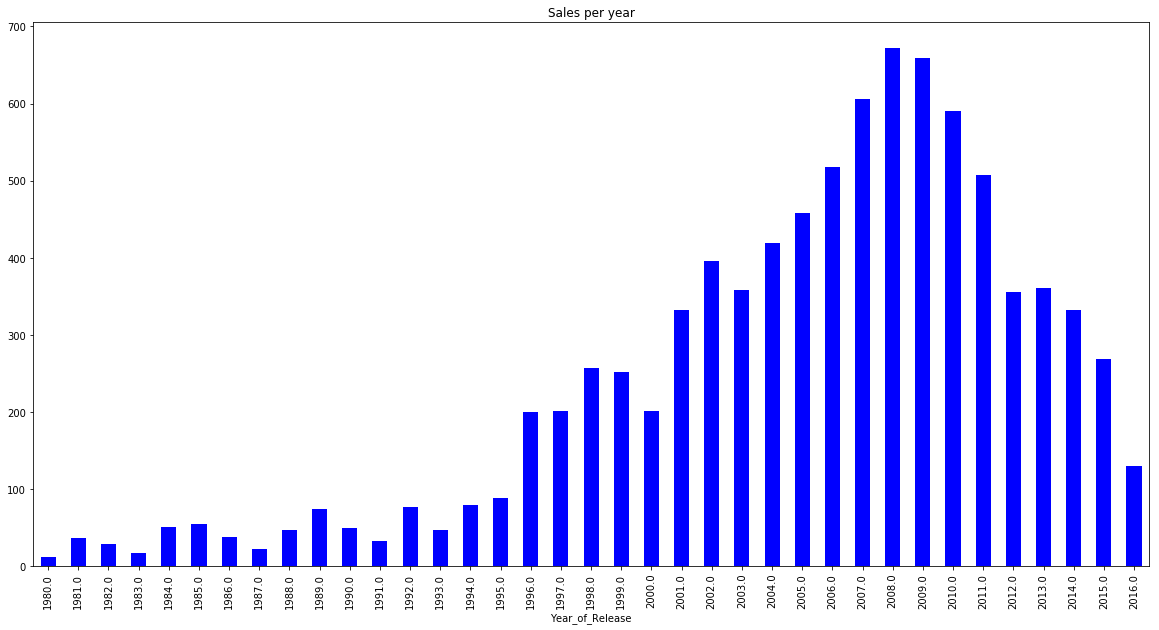

In [12]:
yearly_sales['Global_Sales'].plot(kind='bar', title="Sales per year", figsize=(20,10), color = 'b')

C:\Users\Ciaran\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


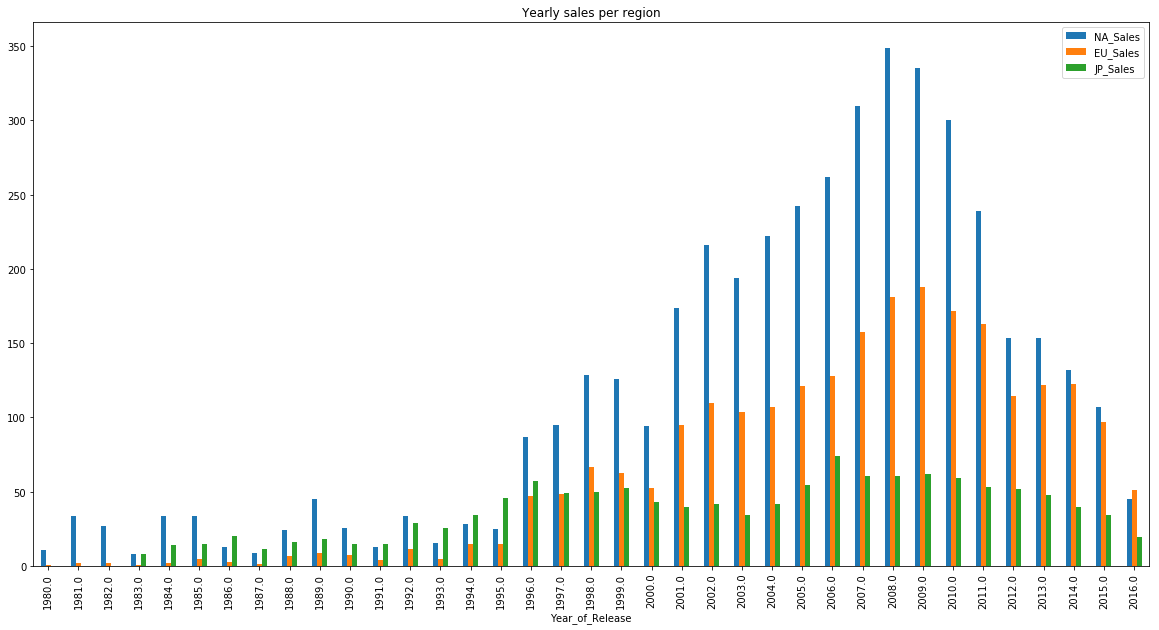

In [13]:
yearly_sales.plot(y = ['NA_Sales', 'EU_Sales', 'JP_Sales'], kind = 'bar', title = 'Yearly sales per region', figsize = (20,10))

From above see that 2008 was the best year for sales of videogames. However we see from the second graph that for EU the best year was 2009, and for Japan the best year was 2006.

We can also see that from 1980 until 1995 the market was quite volatile with each year jumping up and down.

In [20]:
action = videogames[videogames['Genre'] == 'Action']
genre = action.groupby('Year_of_Release', as_index = False)['Global_Sales'].sum()
genre.rename(columns={'Global_Sales': 'Action'}, inplace=True)
genre = genre.set_index('Year_of_Release')

In [21]:
adventure = videogames[videogames['Genre'] == 'Adventure']
tmp = adventure.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Adventure'] = tmp

In [22]:
sports = videogames[videogames['Genre'] == 'Sports']
tmp = sports.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Sports'] = tmp

In [23]:
platform = videogames[videogames['Genre'] == 'Platform']
tmp = platform.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Platform'] = tmp

In [24]:
racing = videogames[videogames['Genre'] == 'Racing']
tmp = racing.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Racing'] = tmp

In [25]:
role_playing = videogames[videogames['Genre'] == 'Role-Playing']
tmp = role_playing.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Role-Playing'] = tmp

In [26]:
puzzle = videogames[videogames['Genre'] == 'Puzzle']
tmp = puzzle.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Puzzle'] = tmp

In [27]:
misc = videogames[videogames['Genre'] == 'Misc']
tmp = misc.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Misc'] = tmp

In [28]:
shooter = videogames[videogames['Genre'] == 'Shooter']
tmp = shooter.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Shooter'] = tmp

In [29]:
simulation = videogames[videogames['Genre'] == 'Simulation']
tmp = simulation.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Simulation'] = tmp

In [30]:
fighting = videogames[videogames['Genre'] == 'Fighting']
tmp = fighting.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Fighting'] = tmp

In [31]:
strategy = videogames[videogames['Genre'] == 'Strategy']
tmp = strategy.groupby(['Year_of_Release'])['Global_Sales'].sum()
genre['Strategy'] = tmp
genre.fillna(value = 0, inplace = True)
genre.head()

Action  Adventure  Sports  Platform  Racing  Role-Playing  \
Year_of_Release                                                              
1980.0             0.34        0.0    0.49      0.00    0.00           0.0   
1981.0            14.84        0.0    0.79      6.93    0.48           0.0   
1982.0             6.52        0.0    1.05      5.03    1.57           0.0   
1983.0             2.86        0.4    3.20      6.93    0.00           0.0   
1984.0             1.85        0.0    6.18      0.69    5.95           0.0   

                 Puzzle  Misc  Shooter  Simulation  Fighting  Strategy  
Year_of_Release                                                         
1980.0             0.00  2.71     7.07        0.00      0.77       0.0  
1981.0             2.24  0.00    10.04        0.45      0.00       0.0  
1982.0            10.03  0.87     3.79        0.00      0.00       0.0  
1983.0             0.78  2.14     0.48        0.00      0.00       0.0  
1984.0             3.14  1.45    31.10        0.00      0.00       0.0

C:\Users\Ciaran\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


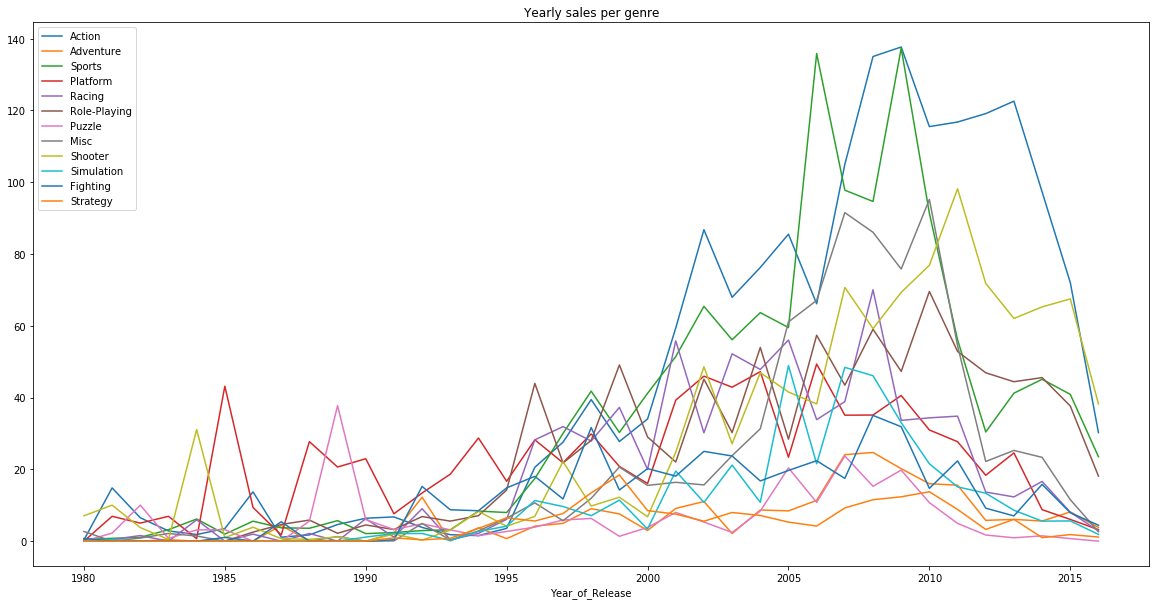

In [74]:
genre.plot(y = ['Action', 'Adventure', 'Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle',
               'Misc', 'Shooter', 'Simulation', 'Fighting', 'Strategy'], kind = 'line', title = 'Yearly sales per genre', figsize = (20,10))

The above graph shows the sales figures for each genre. It is a bit messy but gives a good insight into what to look closely at when answering the research question in the results.

In [36]:
platform_sales = videogames.groupby('Platform')[['Global_Sales']].sum()
platform_sales.head()

Global_Sales
Platform              
2600             86.57
3DO               0.10
3DS             257.92
DC               15.97
DS              803.44

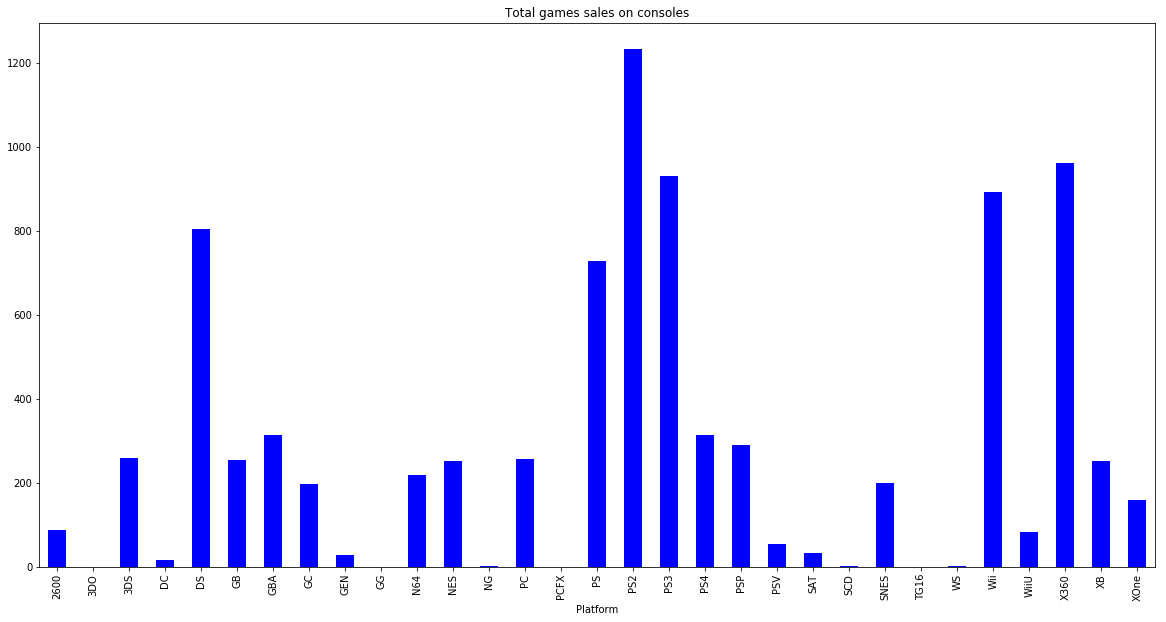

In [75]:
platform_sales['Global_Sales'].plot(kind='bar', title="Total games sales on consoles", figsize=(20,10), color = 'b')

The above shows the total sales of games by each console. We can see that the playsation 2 was the best performing console.

Im also going to get the yearly sales for each console to use in the research question.

In [39]:
console = videogames.groupby('Year_of_Release', as_index = False)['Global_Sales'].sum()
console = console.set_index('Year_of_Release')

In [40]:
nes = videogames[videogames['Platform'] == 'NES']
tmp = nes.groupby('Year_of_Release')['Global_Sales'].sum()
console['NES'] = tmp

In [41]:
wii = videogames[videogames['Platform'] == 'Wii']
tmp = wii.groupby('Year_of_Release')['Global_Sales'].sum()
console['Wii'] = tmp

In [42]:
gb = videogames[videogames['Platform'] == 'GB']
tmp = gb.groupby('Year_of_Release')['Global_Sales'].sum()
console['GB'] = tmp

In [43]:
ds = videogames[videogames['Platform'] == 'DS']
tmp = ds.groupby('Year_of_Release')['Global_Sales'].sum()
console['DS'] = tmp

In [44]:
x360 = videogames[videogames['Platform'] == 'X360']
tmp = x360.groupby('Year_of_Release')['Global_Sales'].sum()
console['X360'] = tmp

In [45]:
ps3 = videogames[videogames['Platform'] == 'PS3']
tmp = ps3.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS3'] = tmp

In [46]:
ps2 = videogames[videogames['Platform'] == 'PS2']
tmp = ps2.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS2'] = tmp

In [47]:
snes = videogames[videogames['Platform'] == 'SNES']
tmp = snes.groupby('Year_of_Release')['Global_Sales'].sum()
console['SNES'] = tmp

In [48]:
gba = videogames[videogames['Platform'] == 'GBA']
tmp = gba.groupby('Year_of_Release')['Global_Sales'].sum()
console['GBA'] = tmp

In [49]:
ps4 = videogames[videogames['Platform'] == 'PS4']
tmp = ps4.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS4'] = tmp

In [50]:
tds = videogames[videogames['Platform'] == '3DS']
tmp = tds.groupby('Year_of_Release')['Global_Sales'].sum()
console['3DS'] = tmp

In [51]:
n64 = videogames[videogames['Platform'] == 'N64']
tmp = n64.groupby('Year_of_Release')['Global_Sales'].sum()
console['N64'] = tmp

In [52]:
ps = videogames[videogames['Platform'] == 'PS']
tmp = ps.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS'] = tmp

In [53]:
xb = videogames[videogames['Platform'] == 'XB']
tmp = xb.groupby('Year_of_Release')['Global_Sales'].sum()
console['XB'] = tmp

In [54]:
pc = videogames[videogames['Platform'] == 'PC']
tmp = pc.groupby('Year_of_Release')['Global_Sales'].sum()
console['PC'] = tmp

In [55]:
a2600 = videogames[videogames['Platform'] == '2600']
tmp = a2600.groupby('Year_of_Release')['Global_Sales'].sum()
console['2600'] = tmp

In [56]:
psp = videogames[videogames['Platform'] == 'PSP']
tmp = psp.groupby('Year_of_Release')['Global_Sales'].sum()
console['PSP'] = tmp

In [57]:
xone = videogames[videogames['Platform'] == 'XOne']
tmp = xone.groupby('Year_of_Release')['Global_Sales'].sum()
console['XOne'] = tmp

In [58]:
wiiu = videogames[videogames['Platform'] == 'WiiU']
tmp = wiiu.groupby('Year_of_Release')['Global_Sales'].sum()
console['WiiU'] = tmp

In [59]:
gc = videogames[videogames['Platform'] == 'GC']
tmp = gc.groupby('Year_of_Release')['Global_Sales'].sum()
console['GC'] = tmp

In [60]:
gen = videogames[videogames['Platform'] == 'GEN']
tmp = gen.groupby('Year_of_Release')['Global_Sales'].sum()
console['GEN'] = tmp

In [61]:
dc = videogames[videogames['Platform'] == 'DC']
tmp = dc.groupby('Year_of_Release')['Global_Sales'].sum()
console['DC'] = tmp

In [62]:
psv = videogames[videogames['Platform'] == 'PSV']
tmp = psv.groupby('Year_of_Release')['Global_Sales'].sum()
console['PSV'] = tmp

In [63]:
sat = videogames[videogames['Platform'] == 'SAT']
tmp = sat.groupby('Year_of_Release')['Global_Sales'].sum()
console['SAT'] = tmp

In [64]:
scd = videogames[videogames['Platform'] == 'SCD']
tmp = scd.groupby('Year_of_Release')['Global_Sales'].sum()
console['SCD'] = tmp

In [65]:
ws = videogames[videogames['Platform'] == 'WS']
tmp = ws.groupby('Year_of_Release')['Global_Sales'].sum()
console['WS'] = tmp

In [66]:
ng = videogames[videogames['Platform'] == 'NG']
tmp = ng.groupby('Year_of_Release')['Global_Sales'].sum()
console['NG'] = tmp

In [67]:
tg16 = videogames[videogames['Platform'] == 'TG16']
tmp = tg16.groupby('Year_of_Release')['Global_Sales'].sum()
console['TG16'] = tmp

In [68]:
dO = videogames[videogames['Platform'] == '3DO']
tmp = dO.groupby('Year_of_Release')['Global_Sales'].sum()
console['3DO'] = tmp

In [69]:
gg = videogames[videogames['Platform'] == 'GG']
tmp = gg.groupby('Year_of_Release')['Global_Sales'].sum()
console['GG'] = tmp

In [70]:
pcfx = videogames[videogames['Platform'] == 'PCFX']
tmp = pcfx.groupby('Year_of_Release')['Global_Sales'].sum()
console['PCFX'] = tmp

In [72]:
del console['Global_Sales']

In [73]:
console.fillna(value = 0, inplace = True)
console.head()

NES  Wii   GB   DS  X360  PS3  PS2  SNES  GBA  PS4  ...   \
Year_of_Release                                                        ...    
1980.0            0.00  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    
1981.0            0.00  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    
1982.0            0.00  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    
1983.0           10.96  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    
1984.0           50.09  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    

                  DC  PSV  SAT  SCD   WS   NG  TG16  3DO   GG  PCFX  
Year_of_Release                                                      
1980.0           0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  
1981.0           0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  
1982.0           0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  
1983.0           0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  
1984.0           0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  

[5 rows x 31 columns]

## Industry counts

Getting counts, on a yearly basis, of the companies in the industry and of the other values, such as amount of genres, which can be counted.

In [79]:
counts = videogames.groupby('Year_of_Release').nunique()
counts.head()

Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  \
Year_of_Release                                                                
1980.0              9         1                1      5          2         9   
1981.0             46         1                1      7         14        40   
1982.0             36         1                1      7         18        29   
1983.0             17         2                1      7          4        15   
1984.0             14         2                1      7          4        11   

                 EU_Sales  JP_Sales  Other_Sales  Global_Sales  Developer  
Year_of_Release                                                            
1980.0                  8         1            4             9          0  
1981.0                 12         1            4            39          0  
1982.0                 10         1            4            31          0  
1983.0                  9         7            3            17          0  
1984.0                 11        13            7            13          0

In [80]:
del counts['Year_of_Release']
del counts['NA_Sales']
del counts['EU_Sales']
del counts['JP_Sales']
del counts['Other_Sales']
del counts['Global_Sales']
counts.head()

Name  Platform  Genre  Publisher  Developer
Year_of_Release                                             
1980.0              9         1      5          2          0
1981.0             46         1      7         14          0
1982.0             36         1      7         18          0
1983.0             17         2      7          4          0
1984.0             14         2      7          4          0

The above can be used in the results to analyse different things against each other over the growth of the industry.

Now we will get the counts for the amount of games for each genre made each year which will also be used in our results notebook. 

In [96]:
action = videogames[videogames['Genre'] == 'Action']
genre_counts = action.groupby('Year_of_Release', as_index = False)['Genre'].count()
genre_counts = genre_counts.set_index('Year_of_Release')
genre_counts.rename(columns={'Genre': 'Action'}, inplace=True)

In [97]:
adventure = videogames[videogames['Genre'] == 'Adventure']
tmp = adventure.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Adventure'] = tmp

In [98]:
fighting = videogames[videogames['Genre'] == 'Fighting']
tmp = fighting.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Fighting'] = tmp

In [99]:
misc = videogames[videogames['Genre'] == 'Misc']
tmp = misc.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Misc'] = tmp

In [100]:
platform = videogames[videogames['Genre'] == 'Platform']
tmp = platform.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Platform'] = tmp

In [101]:
puzzle = videogames[videogames['Genre'] == 'Puzzle']
tmp = puzzle.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Puzzle'] = tmp

In [102]:
racing = videogames[videogames['Genre'] == 'Racing']
tmp = racing.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Racing'] = tmp

In [103]:
roleplaying = videogames[videogames['Genre'] == 'Role-Playing']
tmp = roleplaying.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Role-Playing'] = tmp

In [104]:
shooter = videogames[videogames['Genre'] == 'Shooter']
tmp = shooter.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Shooter'] = tmp

In [105]:
simulation = videogames[videogames['Genre'] == 'Simulation']
tmp = simulation.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Simulation'] = tmp

In [106]:
sports = videogames[videogames['Genre'] == 'Sports']
tmp = sports.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Sports'] = tmp

In [107]:
strategy = videogames[videogames['Genre'] == 'Strategy']
tmp = strategy.groupby(['Year_of_Release'])['Genre'].count()
genre_counts['Strategy'] = tmp
genre_counts.fillna(value = 0, inplace = True)
genre_counts.head()

Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Year_of_Release                                                                
1980.0                1        0.0       1.0   4.0       0.0     0.0     0.0   
1981.0               25        0.0       0.0   0.0       3.0     2.0     1.0   
1982.0               18        0.0       0.0   1.0       5.0     3.0     2.0   
1983.0                7        1.0       0.0   1.0       5.0     1.0     0.0   
1984.0                1        0.0       0.0   1.0       1.0     3.0     3.0   

                 Role-Playing  Shooter  Simulation  Sports  Strategy  
Year_of_Release                                                       
1980.0                    0.0      2.0         0.0       1       0.0  
1981.0                    0.0     10.0         1.0       4       0.0  
1982.0                    0.0      5.0         0.0       2       0.0  
1983.0                    0.0      1.0         0.0       1       0.0  
1984.0                    0.0      3.0         0.0       2       0.0

C:\Users\Ciaran\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


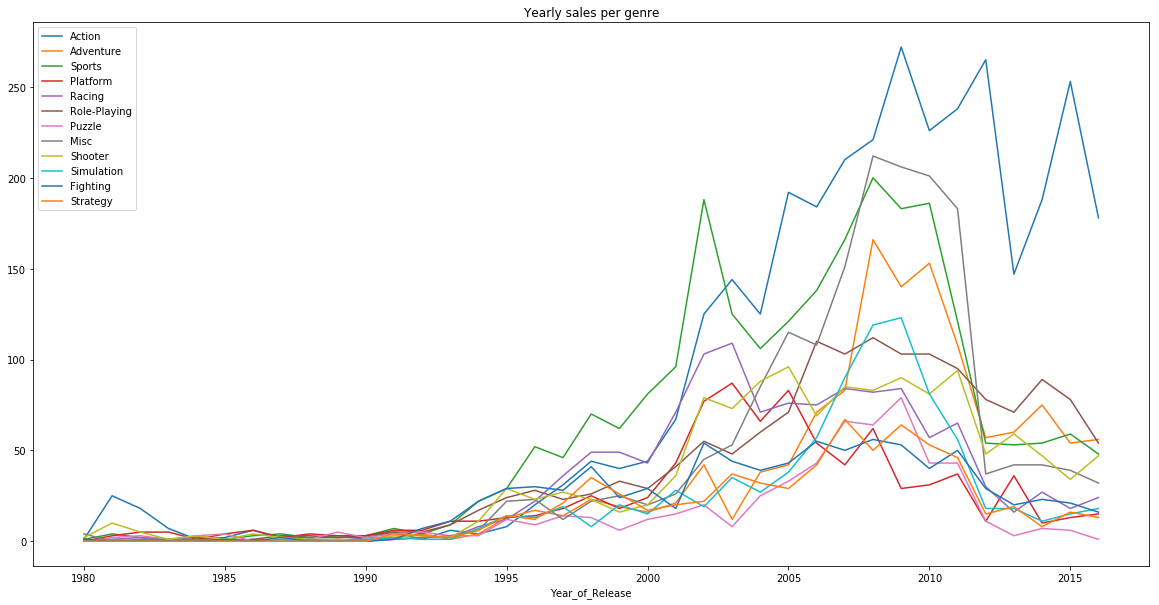

In [108]:
genre_counts.plot(y = ['Action', 'Adventure', 'Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle',
               'Misc', 'Shooter', 'Simulation', 'Fighting', 'Strategy'], kind = 'line', title = 'Yearly sales per genre', figsize = (20,10))

Like above this graph is a bit rough but it those give us a good insight into what we should use when answering the research question.

## Merging the dataframes

In [109]:
frames = [yearly_sales,genre,platform_sales]
yearly_sales = pd.concat(frames)

In [110]:
frames = [counts, genre_counts]
yearly_counts = pd.concat(frames)

## Saving as pickle

In [111]:
yearly_sales.to_pickle("../../data/analysis/200_Industry_Growth_Sales.pkl")
yearly_counts.to_pickle("../../data/analysis/200_Industry_Growth_Counts.pkl")